In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/TCS.csv")
print(df.columns)
df.head()


Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042
1,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561
2,2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549
3,2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294
4,2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624


In [8]:

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')


df['Next Close'] = df['Close'].shift(-1)

df.dropna(inplace=True)


X = df[['Close']]
y = df['Next Close']


R² Score: 0.9897681906349309
MSE: 1789.0338159830835


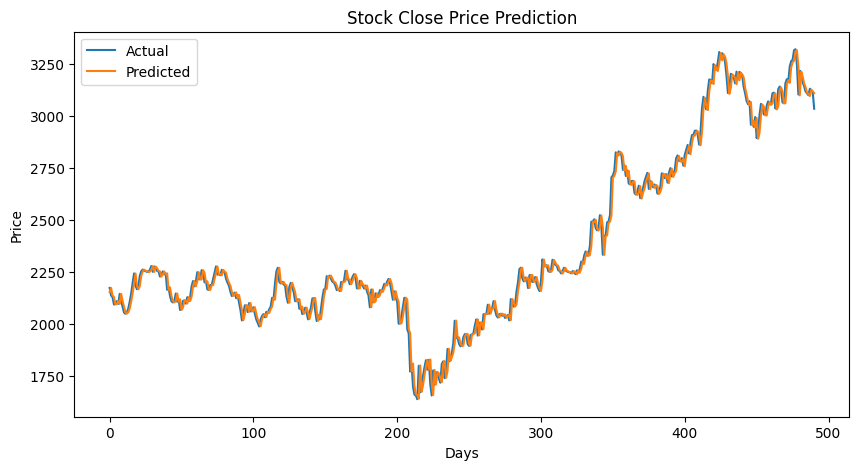

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Metrics
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Plot
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title("Stock Close Price Prediction")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()


In [13]:
from sklearn.preprocessing import StandardScaler

features = ['Open', 'High', 'Low', 'Close', 'Volume', 'VWAP']  # define your features
X = df[features]  # independent variables

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [17]:
print(df.columns)


Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Next Close'],
      dtype='object')


In [33]:
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'VWAP']
X = df[features]

X = df[features]
y = df['Next Close']  # Replace with your actual target column

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LinearRegression()
model.fit(X_scaled, y)


LinearRegression()

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Define features and target
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'VWAP']
X = df[features]
y = df['Next Close']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)

print("✅ R² Score (Accuracy):", round(r2, 4))


✅ R² Score (Accuracy): 0.9971


In [26]:
import numpy as np
print(type(latest_features))
print(np.array(latest_features).shape)


<class 'numpy.ndarray'>
(1, 6)


In [27]:
# Ensure latest_features is a flat list
flattened_input = np.array(latest_features).reshape(-1)  # turns (1, 1, 6) into (6,)

# Create DataFrame with proper shape
latest_input = pd.DataFrame([flattened_input], columns=features)

# Scale and predict
latest_scaled = scaler.transform(latest_input)
prediction = model.predict(latest_scaled)
print(f"🔮 Predicted Next Close Price: ₹{prediction[0]:.2f}")


🔮 Predicted Next Close Price: ₹3110.67


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


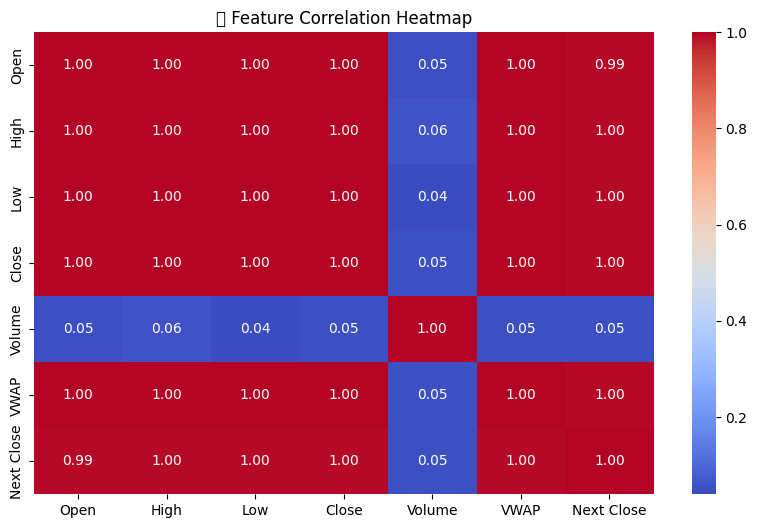

In [28]:
import seaborn as sns

# Select only numeric columns (including Next Close)
numeric_df = df[features + ['Next Close']]

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("📊 Feature Correlation Heatmap")
plt.show()


/tmp/ipython-input-30-1935628394.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


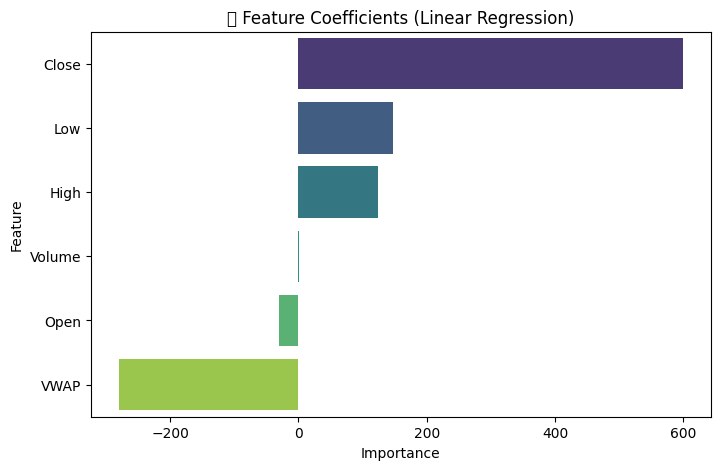

In [30]:
# For Linear Regression
importances = model.coef_[0] if hasattr(model.coef_[0], '__len__') else model.coef_
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort and plot
importance_df = importance_df.sort_values(by='Importance', ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("📌 Feature Coefficients (Linear Regression)")
plt.show()


In [38]:
import joblib

# Save the model
joblib.dump(model, 'stock_price_model.joblib')

# Also save the scaler if you used one
joblib.dump(scaler, 'scaler.joblib')


['scaler.joblib']

In [39]:
import joblib

# Save the model to a file
joblib.dump(model, 'stock_price_model.joblib')

# Save the scaler if you used one
joblib.dump(scaler, 'scaler.joblib')

print("✅ Model and scaler saved successfully!")


✅ Model and scaler saved successfully!


In [40]:
import joblib

# Save the trained model
joblib.dump(model, 'stock_price_model.joblib')

# Save the scaler used during preprocessing
joblib.dump(scaler, 'scaler.joblib')


['scaler.joblib']